# EXERCISE 2: Shallow networks on CIFAR10

Implementation for exercise 2.

## Loading the packages

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print(f'OK: TensorFlow {tf_version} >= 2.0.0' + '.\033[0m')

print("Available devices: ")
print(tf.config.list_physical_devices())

OK: TensorFlow 2.10.0 >= 2.0.0.
Available devices: 
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Loading the raw data
Keras provides easy access to different datasets. First load the `cifar10` dataset and normalize it to be in the range [0, 1]

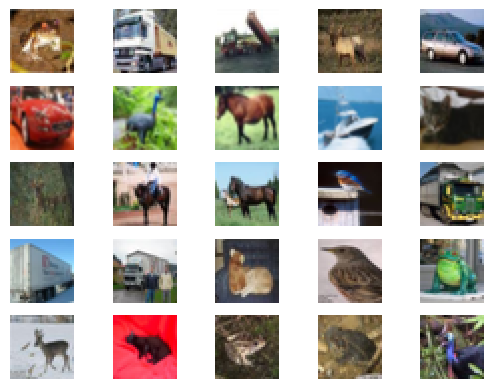

In [4]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and validation sets
(X_train, y_train), (X_val, y_val) = keras.datasets.cifar10.load_data()

show_imgs(X_train)

In [5]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_val.shape: {X_val.shape}")
print(f"y_val.shape: {y_val.shape}")

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_val.shape: (10000, 32, 32, 3)
y_val.shape: (10000, 1)


In [6]:
#X_train = tf.reduce_mean(X_train, axis=3)
#X_val = tf.reduce_mean(X_val, axis=3)
#print(X_train.shape)
X_train = X_train.reshape((50000, -1)) # change the shape towards (60000, 784)
X_val =  X_val.reshape((10000, -1))  # idem (10000, 784)
X_train = X_train.astype('float32') # change the type towards float32
X_val =  X_val.astype('float32') # idem
X_train /= 255 # normalize the range to be between 0.0 and 1.0
X_val /= 255 # normalize the range to be between 0.0 and 1.0

print(f"X_train.shape: {X_train.shape}")
print(f"X_val.shape: {X_val.shape}")
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'test samples')

X_train.shape: (50000, 3072)
X_val.shape: (10000, 3072)
50000 train samples
10000 test samples


In [7]:
print(X_train[0])

[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [8]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes) # modify targets to 1-hot using utils.to_categorical()
Y_val = keras.utils.to_categorical(y_val, n_classes) # idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# One-layer model

In [9]:
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf


def singleLayerModel(name, inputshape):
    model = keras.models.Sequential(name=name)

    model.add(Dense(units=10, activation='linear', input_shape=(inputshape,), kernel_regularizer=tf.keras.regularizers.l2(0.05)))
    model.add(Activation('softmax'))

    return model

D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

sl_model = singleLayerModel("SLM1", D)
sl_model.build((D,))

# compile model
sl_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# ... print model information with summary() method
sl_model.summary()


Model: "SLM1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


## Train the single layer model

In [10]:
nepochs = 5           # number of epochs
nbatch = 128          # batch size

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
                                                                    # use validation set in real life
log_sl = sl_model.fit(X_train, Y_train, batch_size=nbatch, epochs=nepochs, validation_data=(X_val, Y_val))

Epoch 1/5
391/391 [==============================] - 1s 3ms/step - loss: 2.3058 - accuracy: 0.3085 - val_loss: 1.9776 - val_accuracy: 0.3520
Epoch 2/5
391/391 [==============================] - 1s 2ms/step - loss: 2.0031 - accuracy: 0.3294 - val_loss: 1.9710 - val_accuracy: 0.3262
Epoch 3/5
391/391 [==============================] - 1s 2ms/step - loss: 1.9857 - accuracy: 0.3329 - val_loss: 2.0270 - val_accuracy: 0.2994
Epoch 4/5
391/391 [==============================] - 1s 2ms/step - loss: 1.9769 - accuracy: 0.3375 - val_loss: 1.9835 - val_accuracy: 0.3318
Epoch 5/5
391/391 [==============================] - 1s 2ms/step - loss: 1.9873 - accuracy: 0.3296 - val_loss: 1.9768 - val_accuracy: 0.3329


In [ ]:
dir(log_sl)

## Evaluation of the single-layer model

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

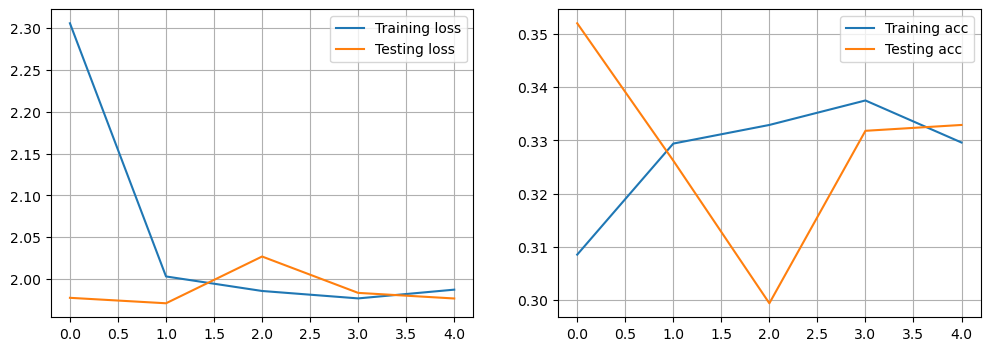

In [12]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_sl.history['loss'], label='Training loss')
ax1.plot(log_sl.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log_sl.history['accuracy'], label='Training acc')
ax2.plot(log_sl.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Evaluate single-layer model
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [13]:
loss_test, metric_test = sl_model.evaluate(X_val, Y_val) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.9768 - accuracy: 0.3329
Test loss: 1.9767680168151855
Test accuracy: 0.3328999876976013


### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(3072, 10)
(10,)


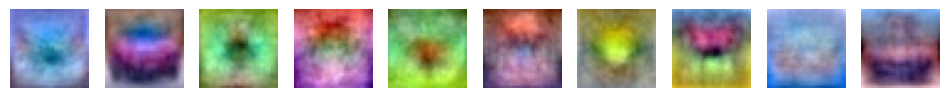

In [14]:
weights = sl_model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                  # get the weights landing to neuron i
    im = im.reshape(32,32, 3)        # reshape the vector of weights into 28x28 image
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)

# Two-layers model

In [22]:
from tensorflow.keras.layers import Dense, Activation, LeakyReLU
import tensorflow as tf


def twoLayerModel(name, inputshape):
    model = keras.models.Sequential(name=name)

    model.add(Dense(units=1024, activation='relu', input_shape=(inputshape,)))
    model.add(Dense(units=1024, activation='linear', input_shape=(1024,)))
    model.add(LeakyReLU(alpha=0.5))
    model.add(Dense(units=512, activation='relu', input_shape=(1024,)))
    model.add(Dense(units=512, activation='relu', input_shape=(512,)))
    model.add(Dense(units=10, activation='linear', input_shape=(512,)))
    model.add(Activation('softmax'))

    return model

D = X_train.shape[1]  # dimension of input sample

twoL_model = twoLayerModel("twoLM1", D)

# ... print model information with summary() method
twoL_model.summary()

# compile model
twoL_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

Model: "twoLM1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
 activation_2 (Activation)   (None, 10)                0    

## Train the two layers model

In [23]:
nepochs = 150           # number of epochs
nbatch = 128          # batch size

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
                                                                    # use validation set in real life
log_twoL = twoL_model.fit(X_train, Y_train, batch_size=nbatch, epochs=nepochs, validation_data=(X_val, Y_val))

Epoch 1/150
391/391 [==============================] - 11s 27ms/step - loss: 1.9150 - accuracy: 0.3061 - val_loss: 1.7210 - val_accuracy: 0.3752
Epoch 2/150
391/391 [==============================] - 10s 26ms/step - loss: 1.6906 - accuracy: 0.3911 - val_loss: 1.6382 - val_accuracy: 0.4006
Epoch 3/150
391/391 [==============================] - 10s 26ms/step - loss: 1.6099 - accuracy: 0.4212 - val_loss: 1.6361 - val_accuracy: 0.4158
Epoch 4/150
391/391 [==============================] - 10s 25ms/step - loss: 1.5586 - accuracy: 0.4381 - val_loss: 1.5290 - val_accuracy: 0.4529
Epoch 5/150
391/391 [==============================] - 10s 26ms/step - loss: 1.5095 - accuracy: 0.4562 - val_loss: 1.5218 - val_accuracy: 0.4512
Epoch 6/150
391/391 [==============================] - 10s 26ms/step - loss: 1.4685 - accuracy: 0.4700 - val_loss: 1.4768 - val_accuracy: 0.4752
Epoch 7/150
391/391 [==============================] - 10s 26ms/step - loss: 1.4449 - accuracy: 0.4773 - val_loss: 1.4958 - val_ac

## Evaluation of the two-layers model

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

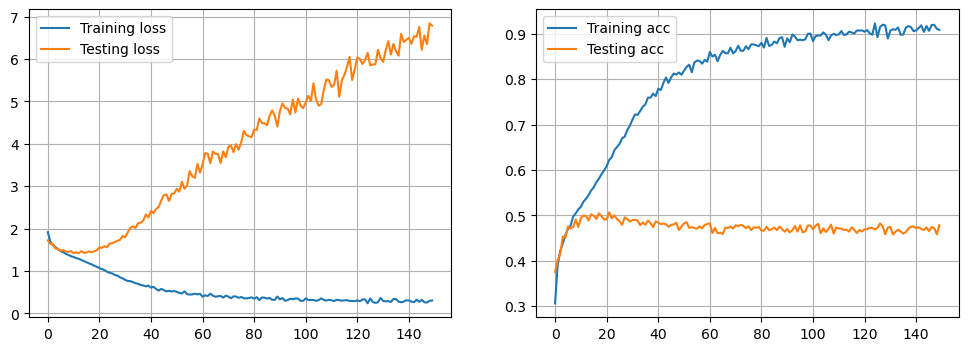

In [24]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_twoL.history['loss'], label='Training loss')
ax1.plot(log_twoL.history['val_loss'], label='Validation loss')
ax1.legend()
ax1.grid()
ax2.plot(log_twoL.history['accuracy'], label='Training acc')
ax2.plot(log_twoL.history['val_accuracy'], label='Validation acc')
ax2.legend()
ax2.grid()

### Evaluate two-layers model
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [18]:
loss_test, metric_test = twoL_model.evaluate(X_val, Y_val) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4341 - accuracy: 0.5005
Test loss: 1.4340770244598389
Test accuracy: 0.5005000233650208


### Confusion matrix
We can call the `predict()` function to get the predicted classes. The output of this function is an array with the predicted class probabilities, from which we need to take the argmax for each row to get the class label as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [19]:
pred = twoL_model.predict(X_val) # ...   get the output posterior probabilities
np.argmax(pred[0])

313/313 [==============================] - 1s 3ms/step


5

In [ ]:
y_pred = np.argmax(pred, axis=-1) # ... get the winner labels with np.argmax()
print(y_pred[:10])
print(y_val[:10])
cm = confusion_matrix(y_val, y_pred) # ... get the confusion matrix with scikit learn confusion_matrix()
print(cm)

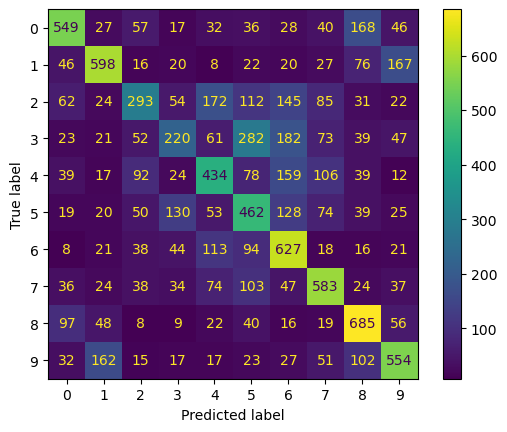

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Exercise 3: Implementing CNN

## Simple CNN

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print(f'OK: TensorFlow {tf_version} >= 2.0.0' + '.\033[0m')

print("Available devices: ")
print(tf.config.list_physical_devices())

OK: TensorFlow 2.6.0 >= 2.0.0.
Available devices: 
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


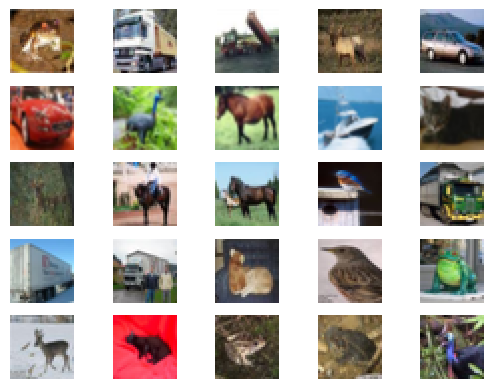

In [3]:
# load the data new
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and validation sets
(X_train, y_train), (X_val, y_val) = keras.datasets.cifar10.load_data()

show_imgs(X_train)

n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes) # modify targets to 1-hot using utils.to_categorical()
Y_val = keras.utils.to_categorical(y_val, n_classes) # idem 

In [4]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {Y_train.shape}")
print(f"X_val.shape: {X_val.shape}")
print(f"y_val.shape: {Y_val.shape}")

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 10)
X_val.shape: (10000, 32, 32, 3)
y_val.shape: (10000, 10)


In [5]:
from tensorflow.keras.layers import Dense, Conv2D, ReLU, Reshape, Softmax, MaxPool2D, LeakyReLU
import tensorflow as tf

# build the model

def simpleCNN(name, inputshape):
    
    model = keras.models.Sequential(name=name)

    model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=inputshape))
    model.add(ReLU())

    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Reshape((-1,)))
    model.add(Dense(units=10, activation='linear', input_shape=(-1,)))
    model.add(Softmax(axis=-1))

    return model


D = X_train.shape[1:]  # dimension of input sample
print(f"Input shape: {D}")

sCNN_model = simpleCNN("sCNN_model", D)

# ... print model information with summary() method
sCNN_model.summary()

# compile model
sCNN_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

Input shape: (32, 32, 3)
Model: "sCNN_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
reshape (Reshape)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                81930     
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
___________________________

### Train the simple CNN model

In [59]:
nepochs = 100           # number of epochs
nbatch = 128          # batch size

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
                                                                    # use validation set in real life
log_sCNN = sCNN_model.fit(X_train, Y_train, batch_size=nbatch, epochs=nepochs, validation_data=(X_val, Y_val))

Epoch 1/100
391/391 [==============================] - 8s 19ms/step - loss: 8.2725 - accuracy: 0.2923 - val_loss: 1.8644 - val_accuracy: 0.3906
Epoch 2/100
391/391 [==============================] - 7s 18ms/step - loss: 1.6666 - accuracy: 0.4396 - val_loss: 1.6695 - val_accuracy: 0.4429
Epoch 3/100
391/391 [==============================] - 7s 18ms/step - loss: 1.4644 - accuracy: 0.4992 - val_loss: 1.5873 - val_accuracy: 0.4819
Epoch 4/100
391/391 [==============================] - 7s 18ms/step - loss: 1.3569 - accuracy: 0.5357 - val_loss: 1.6201 - val_accuracy: 0.4656
Epoch 5/100
391/391 [==============================] - 7s 17ms/step - loss: 1.2870 - accuracy: 0.5573 - val_loss: 1.5949 - val_accuracy: 0.4944
Epoch 6/100
391/391 [==============================] - 7s 18ms/step - loss: 1.2256 - accuracy: 0.5786 - val_loss: 1.6510 - val_accuracy: 0.4957
Epoch 7/100
391/391 [==============================] - 7s 18ms/step - loss: 1.1902 - accuracy: 0.5886 - val_loss: 1.6219 - val_accuracy:

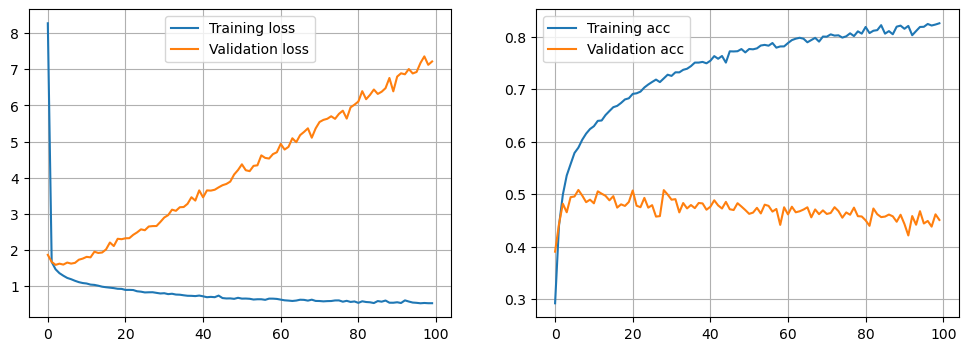

In [60]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_sCNN.history['loss'], label='Training loss')
ax1.plot(log_sCNN.history['val_loss'], label='Validation loss')
ax1.legend()
ax1.grid()
ax2.plot(log_sCNN.history['accuracy'], label='Training acc')
ax2.plot(log_sCNN.history['val_accuracy'], label='Validation acc')
ax2.legend()
ax2.grid()

## Deeper CNN

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, ReLU, Flatten, Softmax, MaxPool2D, Dropout
import tensorflow as tf

# build the model

def deepCNN(name, inputshape):
    
    model = keras.models.Sequential(name=name)

    model.add(Conv2D(filters=32, kernel_size=5, strides=(1,1), padding='same', input_shape=inputshape))
    model.add(ReLU())
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=5, strides=(1,1), padding='same', input_shape=inputshape))
    model.add(ReLU())
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dropout(0.5))
    model.add(Dense(units=1024))
    model.add(ReLU())

    model.add(Dropout(0.5))
    model.add(Dense(units=10, activation='linear'))
    model.add(Softmax(axis=-1))

    return model


D = X_train.shape[1:]  # dimension of input sample
print(f"Input shape: {D}")

deepCNN_model = deepCNN("deepCNN_model", D)

# ... print model information with summary() method
deepCNN_model.summary()

# compile model
# try with:                                                                    0.1, 0.01
deepCNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=True),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

Input shape: (32, 32, 3)
Model: "deepCNN_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)           

### Train the model

In [7]:
import time
import datetime as dt

nepochs = 100           # number of epochs
nbatch = 128          # batch size

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
                                                                    # use validation set in real life
timestamp = time.monotonic()
log_deepCNN = deepCNN_model.fit(X_train, Y_train, batch_size=nbatch, epochs=nepochs, validation_data=(X_val, Y_val))
timestamp1 = time.monotonic()

print(f"Total training time: {(dt.datetime.fromtimestamp(timestamp1 - timestamp) - dt.timedelta(hours=1)).strftime('%H:%M:%S:%f')}")

Epoch 1/100
391/391 [==============================] - 11s 19ms/step - loss: 3.1943 - accuracy: 0.1102 - val_loss: 2.2999 - val_accuracy: 0.1066
Epoch 2/100
391/391 [==============================] - 7s 18ms/step - loss: 2.2828 - accuracy: 0.1194 - val_loss: 2.2374 - val_accuracy: 0.1561
Epoch 3/100
391/391 [==============================] - 7s 18ms/step - loss: 2.2975 - accuracy: 0.1111 - val_loss: 2.2947 - val_accuracy: 0.1134
Epoch 4/100
391/391 [==============================] - 7s 18ms/step - loss: 2.2659 - accuracy: 0.1342 - val_loss: 2.1291 - val_accuracy: 0.2094
Epoch 5/100
391/391 [==============================] - 7s 18ms/step - loss: 2.0572 - accuracy: 0.2414 - val_loss: 1.7716 - val_accuracy: 0.3674
Epoch 6/100
391/391 [==============================] - 7s 18ms/step - loss: 1.7180 - accuracy: 0.3790 - val_loss: 1.5004 - val_accuracy: 0.4575
Epoch 7/100
391/391 [==============================] - 7s 18ms/step - loss: 1.5384 - accuracy: 0.4455 - val_loss: 1.4104 - val_accuracy

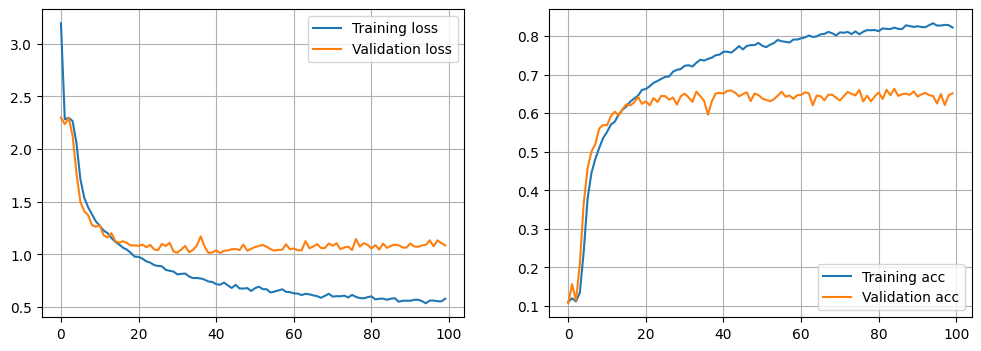

In [8]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_deepCNN.history['loss'], label='Training loss')
ax1.plot(log_deepCNN.history['val_loss'], label='Validation loss')
ax1.legend()
ax1.grid()
ax2.plot(log_deepCNN.history['accuracy'], label='Training acc')
ax2.plot(log_deepCNN.history['val_accuracy'], label='Validation acc')
ax2.legend()
ax2.grid()